# P1 - Identificando personas desde una imagen de su cara

Elaborado por GRUPO 1:

- Juanita Piraban Barbosa - 201216313
- Lorena Morales Rodríguez - 202027957
- Alejandro Barinas Guio - 201628859
- Jaime Humberto Trujillo Perea - 201920366
- Alexander Zapata Galindo - 201425426

In [2]:
# Librerías
from sklearn.datasets import fetch_lfw_people
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

from keras import models
from keras import layers

import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np

In [160]:
# DataSet
lfw_people = fetch_lfw_people(min_faces_per_person=50, resize=0.4)

In [161]:
# Images
lfw_people.images.shape

(1560, 50, 37)

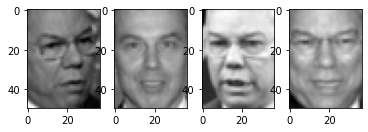

In [162]:
# Ejemplos
plt.subplot(141)
plt.imshow(lfw_people.images[8], cmap=plt.get_cmap('gray'))
plt.subplot(142)
plt.imshow(lfw_people.images[13], cmap=plt.get_cmap('gray'))
plt.subplot(143)
plt.imshow(lfw_people.images[22], cmap=plt.get_cmap('gray'))
plt.subplot(144)
plt.imshow(lfw_people.images[5], cmap=plt.get_cmap('gray'))
# show plot
plt.show()


In [163]:
# images and labels
X = lfw_people.images
y = lfw_people.target
target_names = lfw_people.target_names

In [164]:
X.shape

(1560, 50, 37)

In [165]:
y.shape

(1560,)

In [166]:
# split into a training and testing set
X_train_image, X_test_image, y_train_labels, y_test_labels = train_test_split(
    X, y, test_size=0.25, random_state=42)

In [167]:
#shape train
print(X_train_image.shape)
n_train=X_train_image.shape[0]

(1170, 50, 37)


In [168]:
#shape test
print(X_test_image.shape)
n_test=X_test_image.shape[0]

(390, 50, 37)


In [169]:
# Transformacion
X_train_image = X_train_image.reshape((n_train, 50 * 37))
X_train_image = X_train_image.astype('float32') / 255
X_test_image = X_test_image.reshape((n_test, 50 * 37))
X_test_image = X_test_image.astype('float32') / 255

In [170]:
# Categorizar datos 
y_train_labels = to_categorical(y_train_labels)
y_test_labels = to_categorical(y_test_labels)

In [171]:
y_train_labels.shape

(1170, 12)

In [172]:
y_test_labels.shape

(390, 12)

### MODELO 1

In [176]:
model_1 = models.Sequential()
model_1.add(layers.Dense(1850, activation='relu', input_shape=(50 * 37,)))
model_1.add(layers.Dense(150, activation='relu'))
model_1.add(layers.Dense(12, activation='softmax'))
model_1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [177]:
model_1.fit(X_train_image, y_train_labels, epochs=250, batch_size=256)

Epoch 1/250
5/5 [==============================] - 1s 66ms/step - loss: 3.8586 - accuracy: 0.1229
Epoch 2/250
5/5 [==============================] - 0s 59ms/step - loss: 2.6014 - accuracy: 0.2880
Epoch 3/250
5/5 [==============================] - 0s 53ms/step - loss: 2.2844 - accuracy: 0.3383
Epoch 4/250
5/5 [==============================] - 0s 52ms/step - loss: 2.2423 - accuracy: 0.2140
Epoch 5/250
5/5 [==============================] - 0s 58ms/step - loss: 2.1536 - accuracy: 0.3570
Epoch 6/250
5/5 [==============================] - 0s 52ms/step - loss: 2.1258 - accuracy: 0.3274
Epoch 7/250
5/5 [==============================] - 0s 52ms/step - loss: 2.0346 - accuracy: 0.3700
Epoch 8/250
5/5 [==============================] - 0s 69ms/step - loss: 2.0107 - accuracy: 0.3570
Epoch 9/250
5/5 [==============================] - 0s 64ms/step - loss: 1.9616 - accuracy: 0.3619
Epoch 10/250
5/5 [==============================] - 0s 63ms/step - loss: 1.9392 - accuracy: 0.3738
Epoch 11/250
5/5 [=

5/5 [==============================] - 0s 64ms/step - loss: 0.4276 - accuracy: 0.8920
Epoch 84/250
5/5 [==============================] - 0s 59ms/step - loss: 0.4238 - accuracy: 0.8910
Epoch 85/250
5/5 [==============================] - 0s 58ms/step - loss: 0.3922 - accuracy: 0.8946
Epoch 86/250
5/5 [==============================] - 0s 57ms/step - loss: 0.4192 - accuracy: 0.8876
Epoch 87/250
5/5 [==============================] - 0s 52ms/step - loss: 0.4092 - accuracy: 0.8812
Epoch 88/250
5/5 [==============================] - 0s 51ms/step - loss: 0.4164 - accuracy: 0.8833
Epoch 89/250
5/5 [==============================] - 0s 49ms/step - loss: 0.4227 - accuracy: 0.8926
Epoch 90/250
5/5 [==============================] - 0s 50ms/step - loss: 0.4059 - accuracy: 0.8852
Epoch 91/250
5/5 [==============================] - 0s 50ms/step - loss: 0.3896 - accuracy: 0.8895
Epoch 92/250
5/5 [==============================] - 0s 50ms/step - loss: 0.3825 - accuracy: 0.8976
Epoch 93/250
5/5 [=====

5/5 [==============================] - 0s 55ms/step - loss: 0.1274 - accuracy: 0.9796
Epoch 166/250
5/5 [==============================] - 0s 51ms/step - loss: 0.1325 - accuracy: 0.9734
Epoch 167/250
5/5 [==============================] - 0s 51ms/step - loss: 0.1441 - accuracy: 0.9688
Epoch 168/250
5/5 [==============================] - 0s 53ms/step - loss: 0.1252 - accuracy: 0.9763
Epoch 169/250
5/5 [==============================] - 0s 51ms/step - loss: 0.1302 - accuracy: 0.9793
Epoch 170/250
5/5 [==============================] - 0s 50ms/step - loss: 0.1272 - accuracy: 0.9708
Epoch 171/250
5/5 [==============================] - 0s 52ms/step - loss: 0.1095 - accuracy: 0.9814
Epoch 172/250
5/5 [==============================] - 0s 50ms/step - loss: 0.1531 - accuracy: 0.9611
Epoch 173/250
5/5 [==============================] - 0s 51ms/step - loss: 0.1128 - accuracy: 0.9829
Epoch 174/250
5/5 [==============================] - 0s 52ms/step - loss: 0.1053 - accuracy: 0.9877
Epoch 175/250


5/5 [==============================] - 0s 54ms/step - loss: 0.0596 - accuracy: 0.9891
Epoch 248/250
5/5 [==============================] - 0s 52ms/step - loss: 0.0487 - accuracy: 0.9961
Epoch 249/250
5/5 [==============================] - 0s 53ms/step - loss: 0.0537 - accuracy: 0.9912
Epoch 250/250
5/5 [==============================] - 0s 53ms/step - loss: 0.0511 - accuracy: 0.9929


In [178]:
test_loss, test_acc = model_1.evaluate(X_test_image, y_test_labels)

13/13 [==============================] - 0s 8ms/step - loss: 0.8549 - accuracy: 0.8103
